In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import copy

import matplotlib.pyplot as plt
import neuromodels as nm
import numpy as np
import pandas as pd
import pylfi
import quantities as pq
import scipy.stats as stats
import seaborn as sns

from matplotlib import gridspec

[INFO] [2021.10.26 4:27:13 /Users/runner/miniforge3/conda-bld/nest-simulator_1633677025151/work/nestkernel/rng_manager.cpp:217 @ Network::create_rngs_] : Creating default RNGs
[INFO] [2021.10.26 4:27:13 /Users/runner/miniforge3/conda-bld/nest-simulator_1633677025151/work/nestkernel/rng_manager.cpp:260 @ Network::create_grng_] : Creating new default global RNG

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-2.20.2
 Built: Oct  8 2021 07:17:41

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Set plot style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

# Set fontsizes in figures
size = 10
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": size,
    "font.size": size,
    "legend.fontsize": size,
    "xtick.labelsize": size-1,
    "ytick.labelsize": size-1,
    'legend.handlelength': 2
}

plt.rcParams.update(tex_fonts)
plt.rc('text', usetex=True)

# Set path to save the figures
FIGURE_PATH = "./../latex/figures" 
TABLE_PATH = "./../latex/tables" 

def fig_path(fig_id):
    """
    Input name of figure to load or save with extension as dtype str
    """
    return os.path.join(FIGURE_PATH + "/", fig_id)


def tab_path(tab_id):
    """
    Input name of table to load or save with extension as dtype str
    """
    return os.path.join(TABLE_PATH + "/", tab_id)


def df_to_latex(df, outfile):
    """
    Render dataframe to a LaTeX tabular environment table and write to file
    """
    n = len(df.columns)
    col_format = n * 'c'
    # Render dataframe to a LaTeX tabular environment table and write to file
    pd.options.display.float_format = '{:,.3f}'.format
    df = df.apply(lambda x: x.astype(
        int) if np.allclose(x, x.astype(int)) else x)
    pd.options.display.latex.escape = False
    latex = df.to_latex(index=False, column_format=col_format)
    latex = latex.replace('\\toprule', '\\hline \\hline')
    latex = latex.replace('\\midrule', '\\hline \\hline')
    latex = latex.replace('\\bottomrule', '\\hline \\hline')

    with open(tab_path(outfile), 'w') as f:
        f.write(latex)

# Set figure size
pt = 410 #360

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

fs = set_size(pt, fraction=1)
print(fs)

(5.673170056731701, 3.5062119190183605)


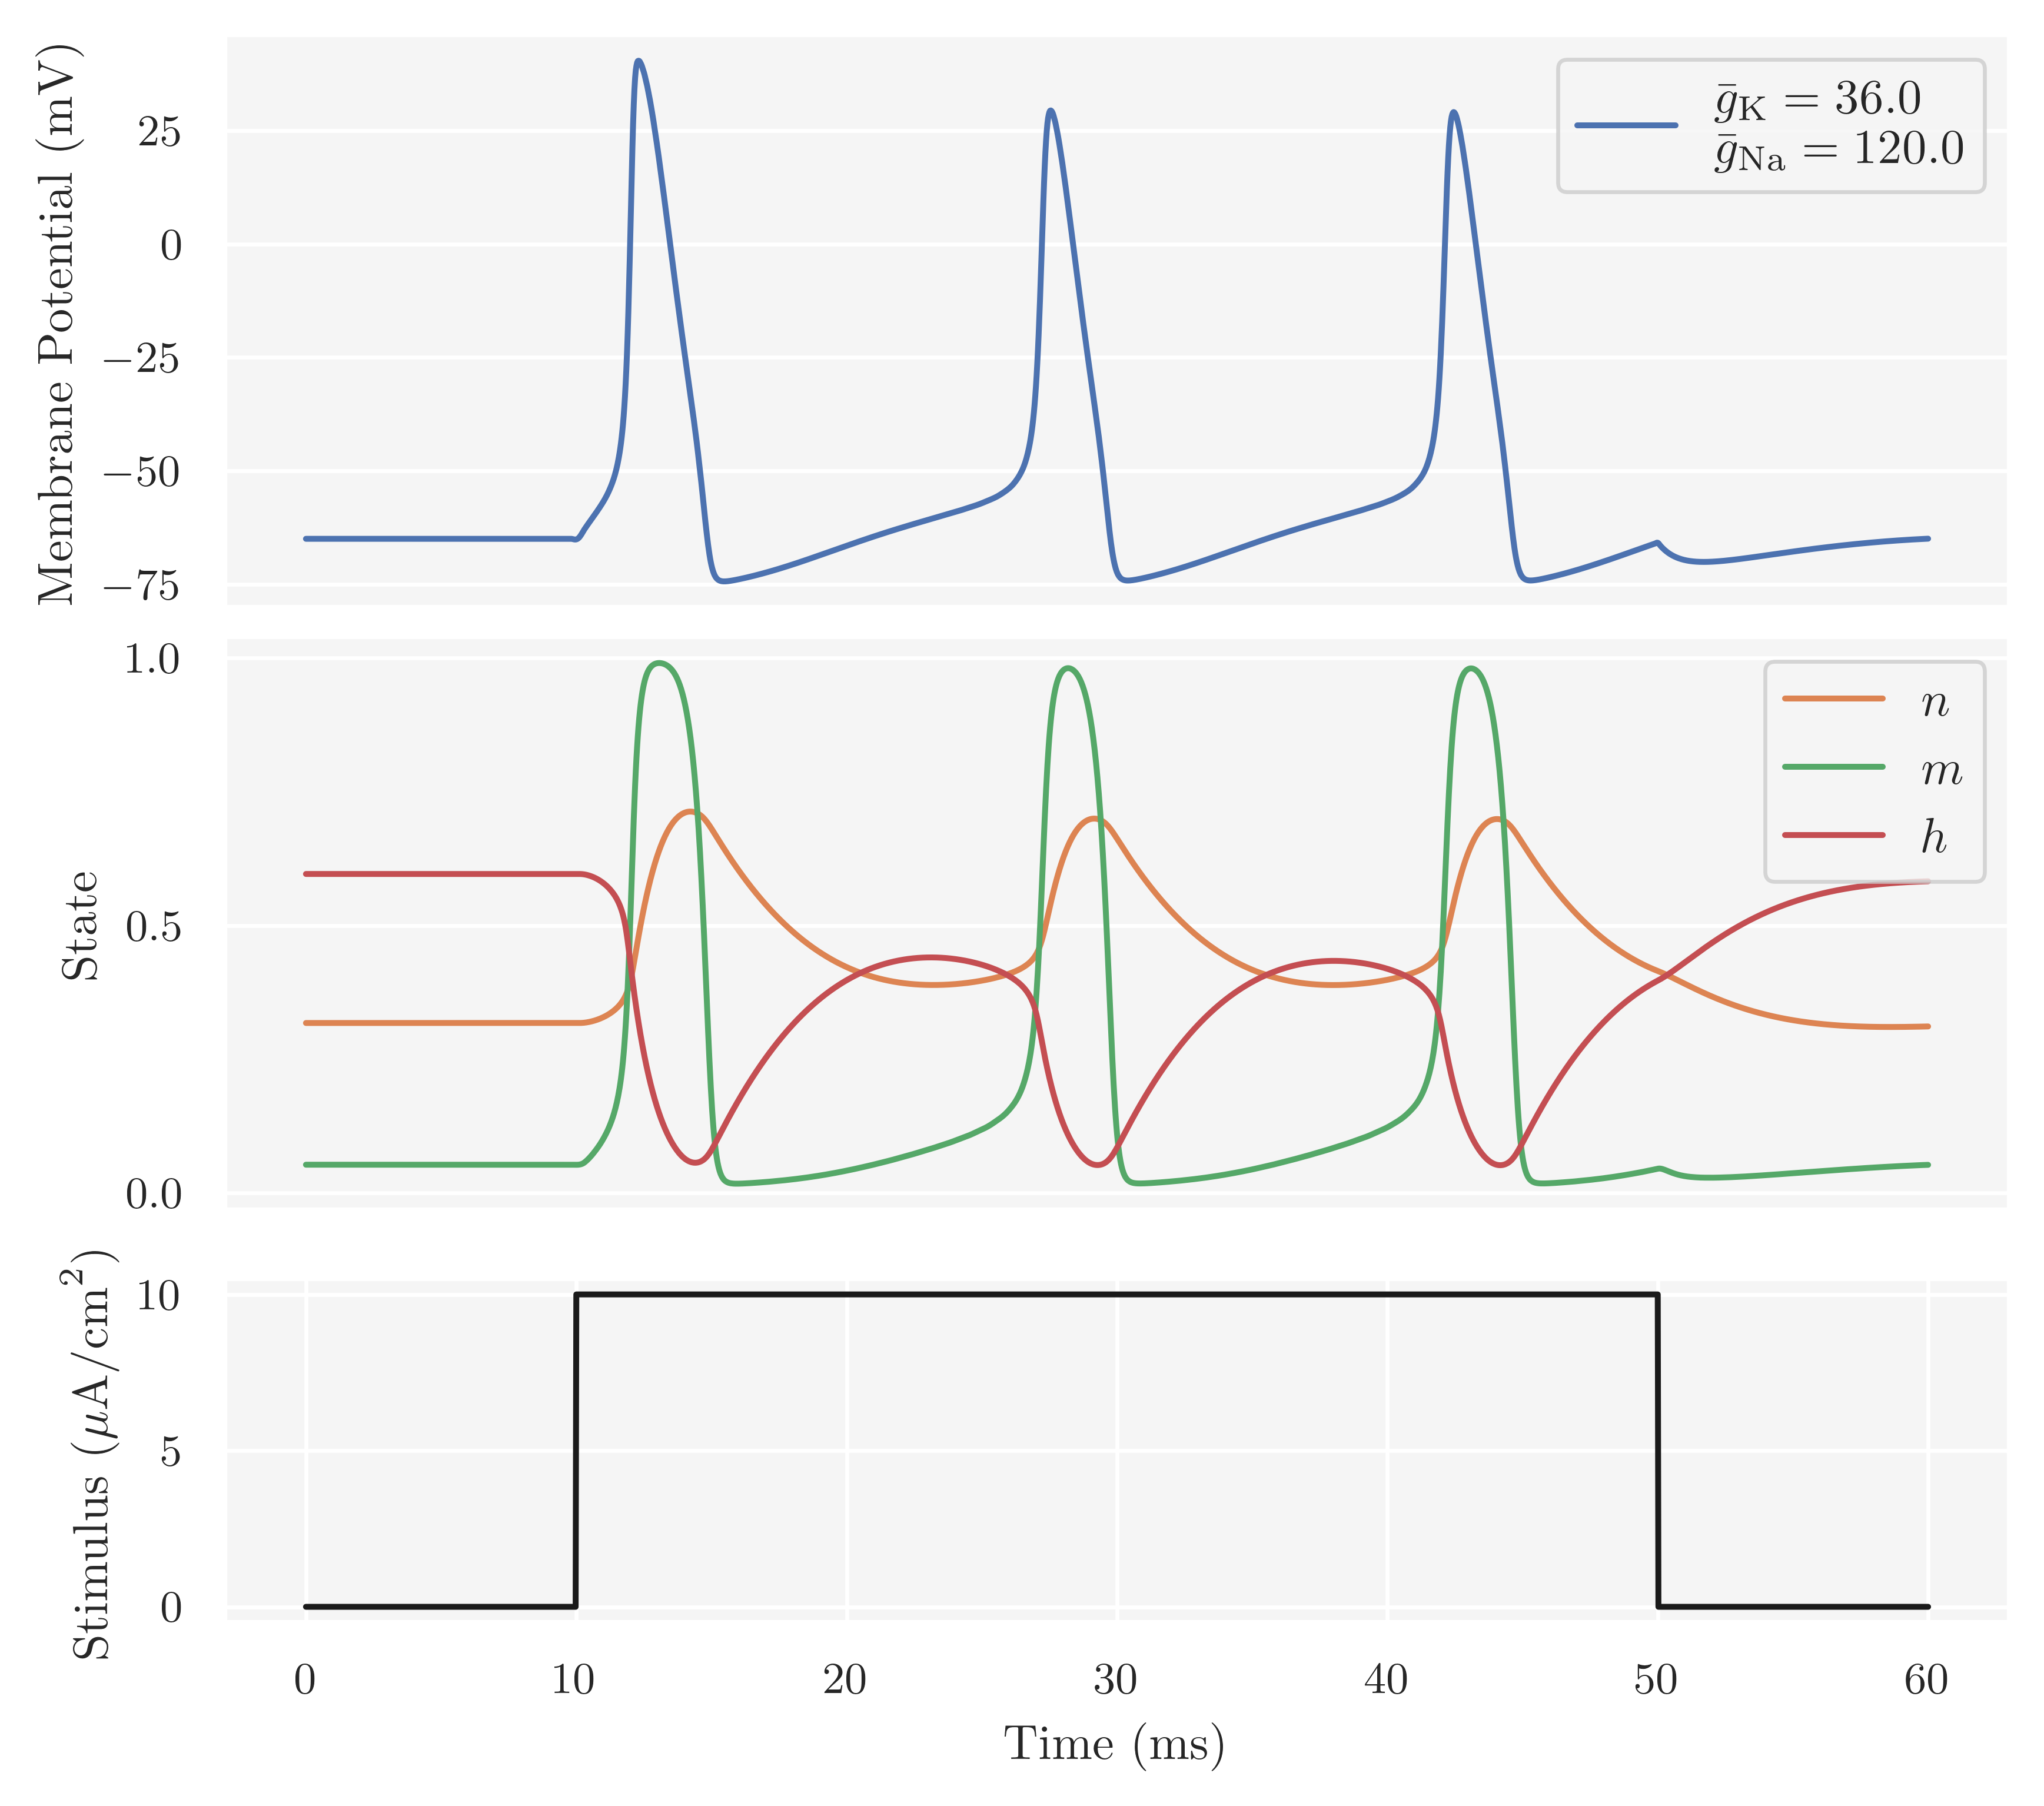

In [59]:
# Simulator model
T = 60           # Simulation time [ms]
dt = 0.025        # Time step [ms]
I_amp = 10        # Input stimuls amplitude [microA/cm^2]
t_stim_on = 10    # Stimulus onset [ms]
t_stim_off = 50  # Stimulus offset [ms]
stimulus = nm.stimulus.Constant(I_amp, t_stim_on, t_stim_off)
hh = nm.models.HodgkinHuxley(stimulus, T, dt) 

params = [36., 120.]
V, t = hh(*params)

n = hh.n 
m = hh.m
h = hh.h

stim = np.array([stimulus(t_i) for t_i in t])

fig, axes = plt.subplots(nrows=3, 
                         ncols=1, 
                         figsize=(fs[0], 5), 
                         constrained_layout=True, 
                         dpi=300, 
                         gridspec_kw={'height_ratios': [5, 5, 3]})


axes[0].plot(t, V, label=fr'$\bar{{g}}_\mathrm{{K}} = {params[0]:.1f}$' + '\n' + fr'$\bar{{g}}_\mathrm{{Na}} = {params[1]:.1f}$')
axes[0].set(xticks=[], ylabel='Membrane Potential (mV)')
axes[0].legend()

axes[1].plot(t, n, color='C1', label=r'$n$')
axes[1].plot(t, m, color='C2', label=r'$m$')
axes[1].plot(t, h, color='C3', label=r'$h$')
axes[1].set(xticks=[], yticks=[0.0, 0.5, 1.0], ylabel='State')
axes[1].legend()

axes[2].plot(t, stim, 'k')
axes[2].set(xlabel='Time (ms)', ylabel=r'Stimulus ($\mu \mathrm{A/cm}^2$)')

fig.savefig(fig_path('hh_states.pdf'), 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight'
           )

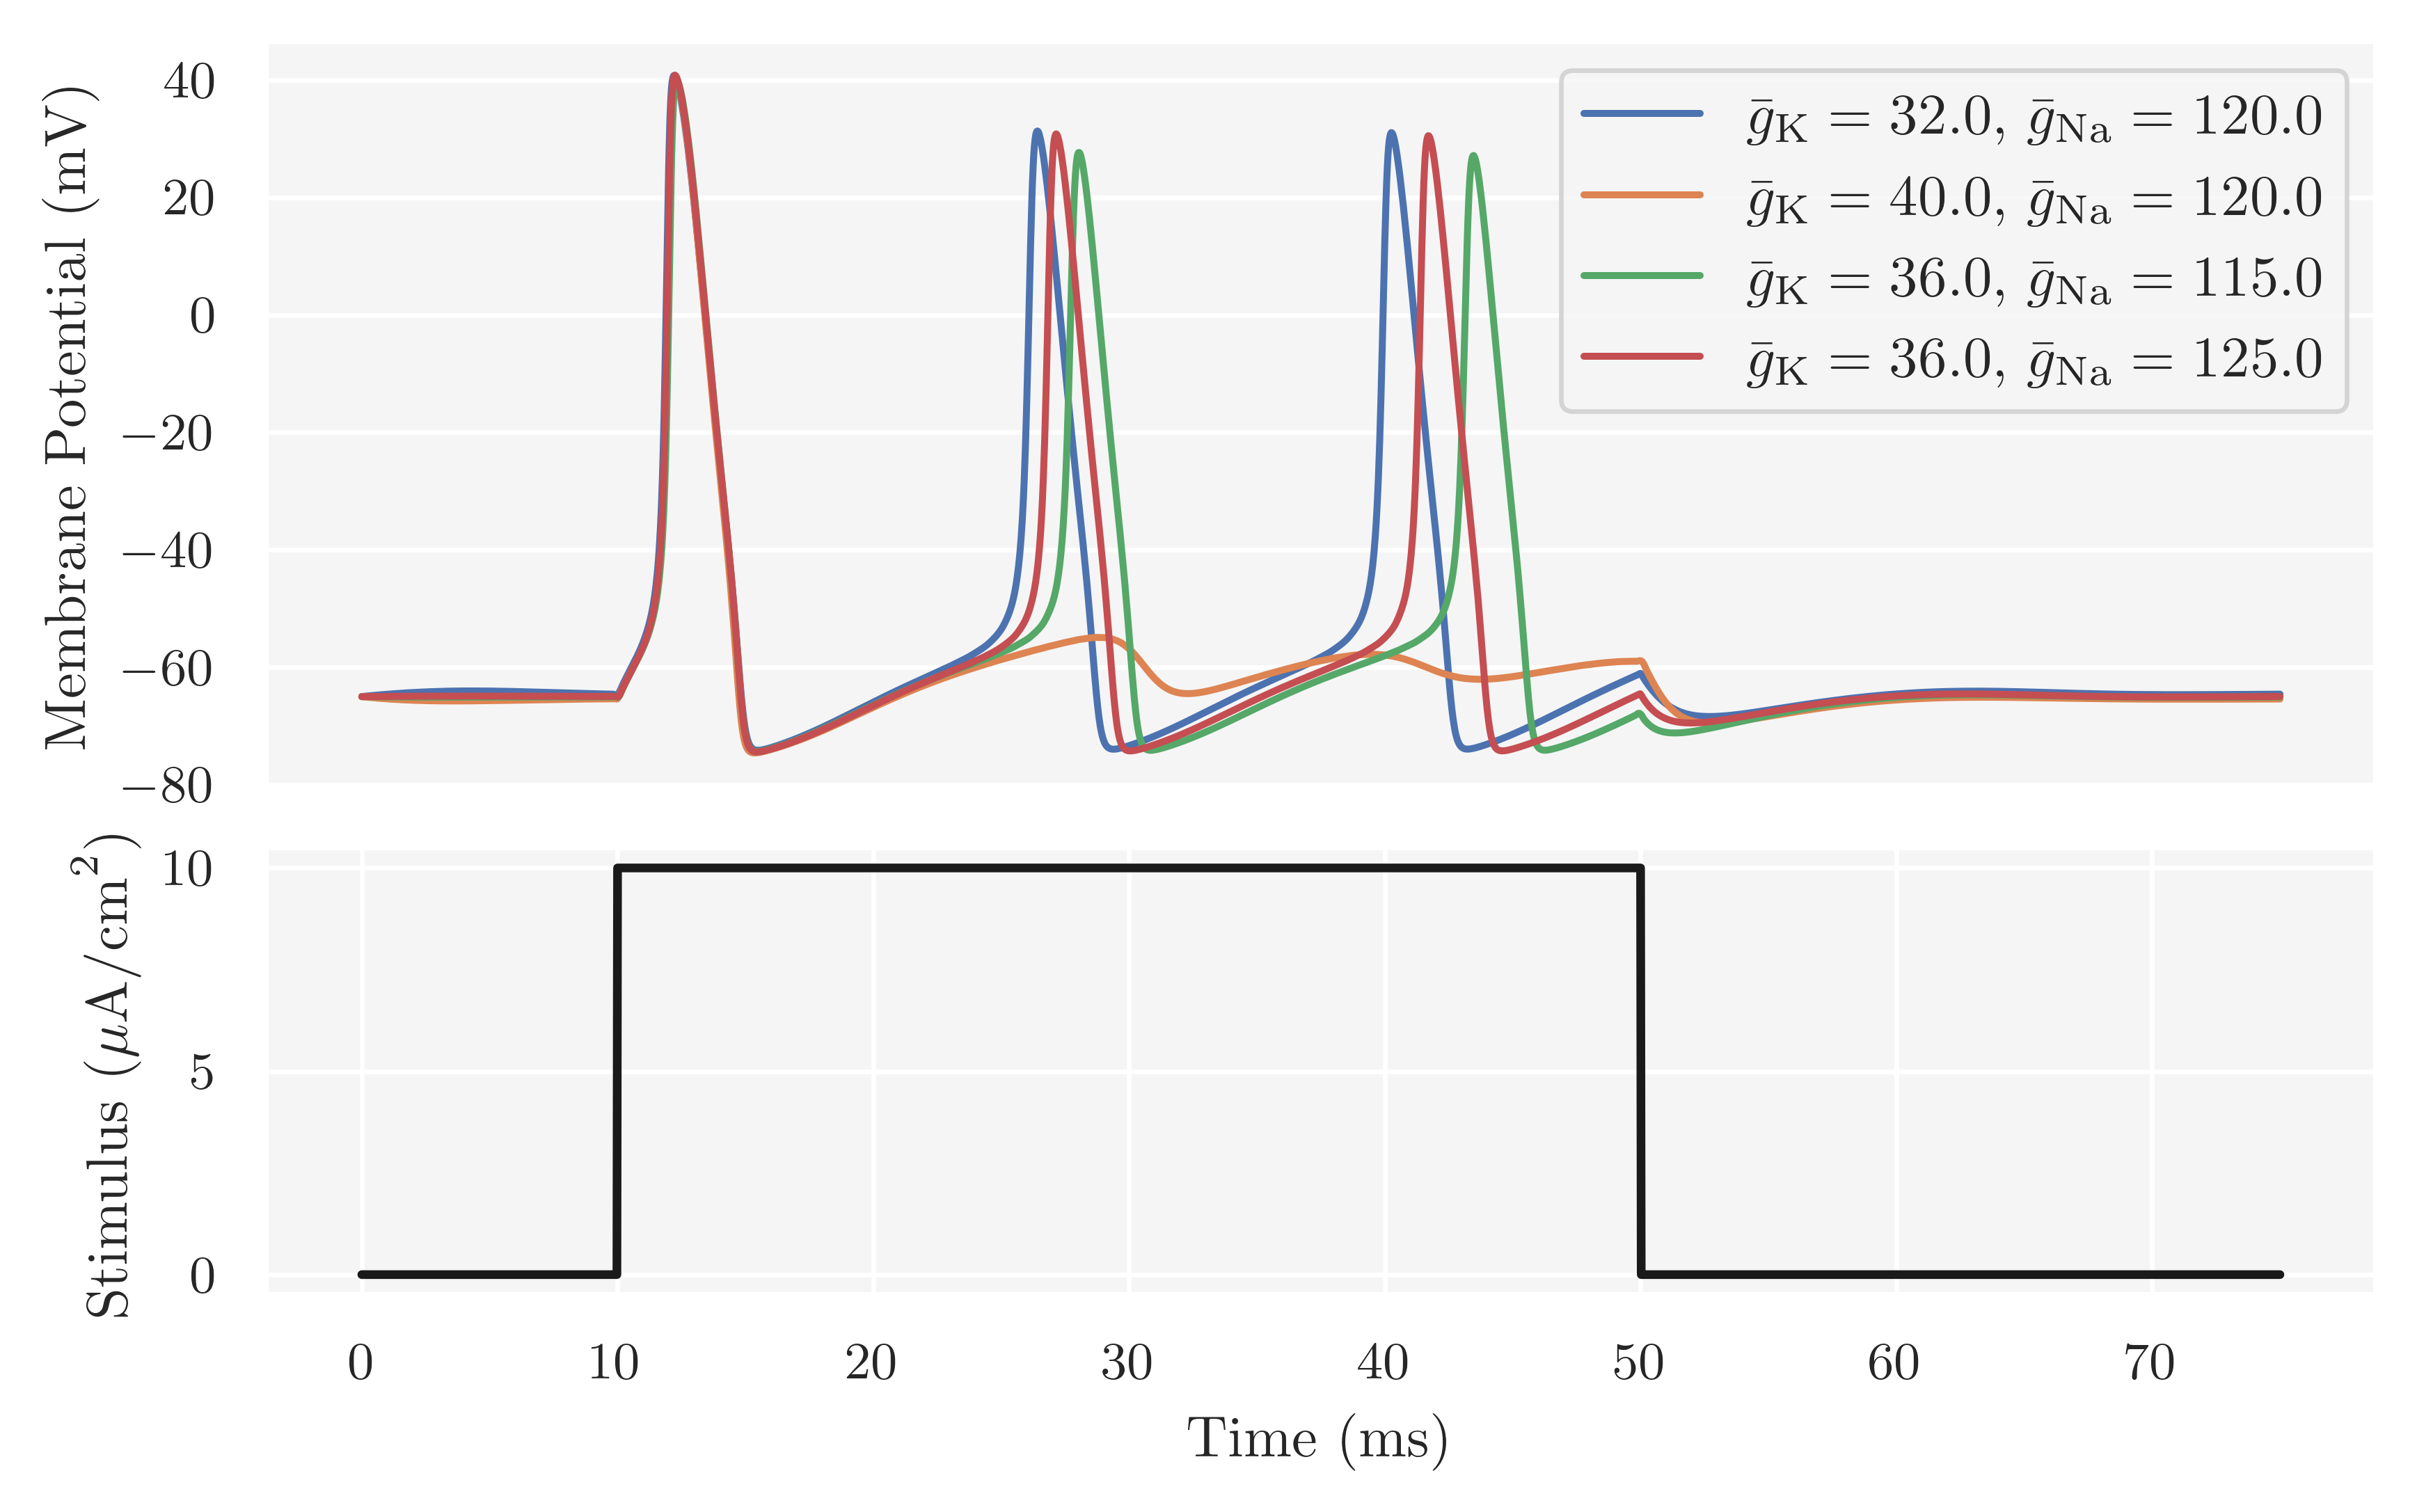

In [60]:
# Simulator model
T = 75           # Simulation time [ms]
dt = 0.025        # Time step [ms]
I_amp = 10        # Input stimuls amplitude [microA/cm^2]
t_stim_on = 10    # Stimulus onset [ms]
t_stim_off = 50  # Stimulus offset [ms]
stimulus = nm.stimulus.Constant(I_amp, t_stim_on, t_stim_off)
hh = nm.models.HodgkinHuxley(stimulus, T, dt) 


fig, axes = plt.subplots(nrows=2, 
                         ncols=1, 
                         figsize=fs, 
                         constrained_layout=True, 
                         dpi=300, 
                         gridspec_kw={'height_ratios': [5, 3]})

params_set = [[32., 120.], [40., 120.], [36., 115.], [36., 125.]]

for i, params in enumerate(params_set):
    V, t = hh(*params)
    axes[0].plot(t, V, ls='-',
        label=fr'$\bar{{g}}_\mathrm{{K}} = {params[0]:.1f}$, $\bar{{g}}_\mathrm{{Na}} = {params[1]:.1f}$')
    
stim = np.array([stimulus(t_i) for t_i in t])

axes[0].set(ylabel='Membrane Potential (mV)',
            xticks=[]
           )
axes[0].legend()

axes[1].plot(t, stim, 'k', lw=1.5)
axes[1].set(xlabel='Time (ms)', ylabel=r'Stimulus ($\mu \mathrm{A/cm}^2$)')

fig.savefig(fig_path('hh_different_gs.pdf'), 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight'
           )